## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
gave2 = pd.read_csv('data/04/committee2_stats_04a.csv')
gave2['name'] = ['comm2__' + x for x in gave2['name']]
gave2.index = list(gave2['name'].values)

cand = pd.read_csv('data/04/cand_cleaned_04bI.csv')
cands = list(set(cand['cand_id']))
cols = [x for x in list(gave2.columns) if x in cands]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
gave2 = gave2[['name'] + cols]
print(len(gave2))
gave2.head(2)

2258


,name,H0AL01055,H0AL01063,H0AL01071,H0AL01089,H0AL01105,H0AL02145,H0AL05163,H0AL05205,H0AL07086,...,S8MN00578,S8MS00261,S8MS00287,S8OR00207,S8TN00311,S8TX00459,total,count,distinct,entity_tps
comm2__BERNIE 2020,comm2__BERNIE 2020,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5500000,2,1,['enttp_Candidate Committee']
comm2__KEVIN MCCARTHY FOR CONGRESS,comm2__KEVIN MCCARTHY FOR CONGRESS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2420464,374,1,"['enttp_Candidate Committee', 'enttp_Organizat..."


In [3]:
# H4CA12055 khanna is incumbent
# H6MD03292 sarbanes is incumbent
# H8MI10108 bizon in primary
# H8MN03143 phillips is incumbent
# H8NY23183 mitrano in primary
# S4NJ00185 booker incumbent
# S8MS00287 espy in primary
for col in gave2.columns:
    if gave2[col].sum() == 0:
        gave2.drop([col], axis = 1, inplace = True)
        print(col)

H0KS03137
H4CA12055
H6MD03292
H8MI10108
H8MN03143
H8NY23183
S4NJ00185
S8MS00287


In [4]:
counts = gave2.drop([
    'name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',

], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts[:20]

712


H8CA45130    19
S4MI00355    18
H2GA02031    17
S4CO00395    17
H8IA01094    16
S4NC00162    16
H8CA10167    16
H8IA03124    16
H8MA02041    15
H8CA10126    15
H8VA07094    15
H8NJ02166    15
H8CA49058    14
H8CA39174    14
H2TX23082    13
H6MN02131    13
H8KS03155    13
H2IL17071    13
H8WI01156    12
S0SC00149    12
dtype: int64

In [5]:
counts_dict = dict(zip(counts.index, counts.values))

cand['comm2_ct'] = [counts_dict[x] if x in counts_dict.keys() else 0 for x in cand['cand_id']]

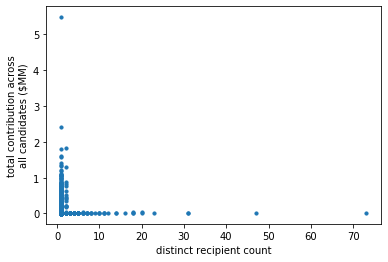

In [6]:
plt.figure()

plt.scatter(
    gave2['distinct'], 
    gave2['total']/1.0E6, 
    s = 10,
)
plt.xlabel('distinct recipient count')
plt.ylabel('total contribution across\nall candidates ($MM)')
plt.show();

In [7]:
# who gave a lot to two distinct recipients?
names = gave2.loc[(gave2['distinct'] > 1) & (gave2['total'] > 34000), 'name']

for name in names:
    lil_cand = cand.loc[cand[name] > 0, [
        'cand_pty_affiliation',
        'cand_id',
        'cand_name',
        'cand_ici',
        'contest',
        name
    ]].sort_values([name], ascending = False).reset_index(drop = True)
    
    lil_cand.columns = [
        'cand_pty_affiliation',
        'cand_id',
        'cand_name',
        'cand_ici',
        'contest',
        name.replace('comm2__', ''), 
    ]
    print(name.replace('comm2__', ''))
    print(lil_cand.to_csv(None))

MCCONNELL SENATE COMMITTEE
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,MCCONNELL SENATE COMMITTEE
0,Republican,S2KY00012,"MCCONNELL, MITCH",I,KY_senate,1823433.0
1,Republican,H8NY01148,"ZELDIN, LEE M",I,NY_01,2500.0

MCSALLY FOR SENATE
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,MCSALLY FOR SENATE
0,Republican,S8AZ00221,"MCSALLY, MARTHA",I,AZ_senate,1309048.0
1,Democrat,H0RI02139,"LANGEVIN, JAMES R HONORABLE",I,RI_02,1500.0

ROUNDS FOR SENATE
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,ROUNDS FOR SENATE
0,Republican,S4SD00049,"ROUNDS, MIKE",I,SD_senate,862550.0
1,Republican,H8SC05158,"NORMAN, RALPH W. JR.",I,SC_05,2500.0

TOM REED FOR CONGRESS
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,TOM REED FOR CONGRESS
0,Republican,H0NY29054,"REED, THOMAS W",I,NY_23,821167.0
1,Democrat,S8MN00578,"SMITH, TINA",O,MN_senate,1000.0

GRAVES FOR CONGRESS
,cand_pty_affiliation,cand_id,cand_name,cand_ici,contest,GRAVES FOR CONGRESS
0,Republican,H0MO0607

In [8]:
# one or two recipients won't help with model building; exclude
gave2 = gave2[gave2['distinct'] > 2]

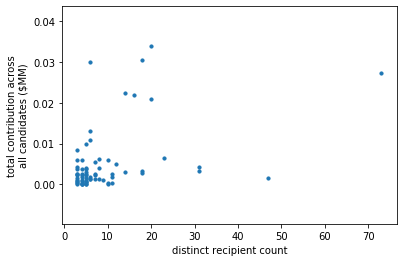

In [9]:
plt.figure()

plt.scatter(
    gave2['distinct'], 
    gave2['total']/1.0E6, 
    s = 10,
)
plt.xlabel('distinct recipient count')
plt.ylabel('total contribution across\nall candidates ($MM)')
plt.show();

In [10]:
std_tot = gave2['total'].std()
med_tot = gave2['total'].median()

std_dist = gave2['distinct'].std()
med_dist = gave2['distinct'].median()

gave2_new = gave2[
    (gave2['total'] > 1.*med_tot + 0.*std_tot) & \
    (gave2['distinct'] > 1.*med_dist + 0.*std_dist)
]

len(gave2_new)

21

In [11]:
gave2_new['distinct'].value_counts().sort_index()

6     3
7     1
8     2
10    1
11    1
12    1
14    2
16    1
18    3
20    2
23    1
31    2
73    1
Name: distinct, dtype: int64

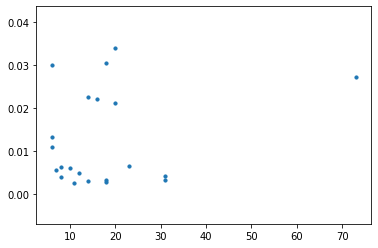

In [12]:
plt.figure()

plt.scatter(
    gave2_new['distinct'], 
    gave2_new['total']/1.0E6, 
    s = 10,
)
plt.show();

In [13]:
rows = []
for comm in list(gave2_new.index):
    lil_row = []
    lil_cand = cand[cand[comm] > 0]
    for which in ['Republican', 'Democrat', 'Third party']:    
        liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
        lil_row.append(liller_cand[comm].sum())
        lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
    rows.append(lil_row)
    
rows = pd.DataFrame(
    rows, 
    columns = [
        'r_amt', 
        'r_count', 
        'd_amt', 
        'd_count',
        't_amt',
        't_count',
    ], 
    index = list(gave2_new['name'].values), 
)

rows.sort_values(['r_amt'], ascending = False, inplace = True)

rows

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm2__2019 SENATORS' CLASSIC COMMITTEE,30000.0,6,0.0,0,0.0,0
comm2__PRE GEORGE'S TRAP AND SKEET CENTER,28092.0,16,2370.0,2,0.0,0
comm2__THE OORBEEK MEMMOT GROUP,21000.0,20,0.0,0,0.0,0
comm2__AUERBACH LEOR,18700.0,11,15300.0,9,0.0,0
comm2__FEDERAL PREMIUM AMMUNITION,6113.0,7,203.0,1,0.0,0
comm2__REID POLITICAL CONSULTING,6100.0,10,0.0,0,0.0,0
comm2__WASHINGTON NATIONALS,4119.0,3,17849.0,13,0.0,0
comm2__UNITED PARCEL SERVICE,3780.0,12,2750.0,11,0.0,0
comm2__SUSAN GAGE CATERERS,3183.0,1,7764.0,5,0.0,0
comm2__SHOOTING STAR SHOTGUN SPORTS,3034.0,16,240.0,2,0.0,0


In [14]:
def show_committee(which):
    lil_cand = cand.loc[cand[which] > 0, [
        'cand_pty_affiliation',
        'cand_name',
        'contest',
        which,
    ]].sort_values([which], ascending = False).reset_index(drop = True)

    lil_cand.columns = [
        'cand_pty_affiliation',
        'cand_name',
        'contest',
        which.replace('comm2__', '')
    ]

    return lil_cand

In [15]:
show_committee('comm2__PRE GEORGE\'S TRAP AND SKEET CENTER')

,cand_pty_affiliation,cand_name,contest,PRE GEORGE'S TRAP AND SKEET CENTER
0,Republican,"YOUNG, DONALD E",AK_00,4440.0
1,Republican,"STEWART, CHRIS",UT_02,2930.0
2,Republican,"RUTHERFORD, JOHN",FL_04,1900.0
3,Republican,"BABIN, BRIAN",TX_36,1840.0
4,Republican,"BUDD, THEODORE P.",NC_13,1750.0
5,Republican,"WOMACK, STEVE",AR_03,1744.0
6,Republican,"DUNCAN, JEFFREY D MR.",SC_03,1610.0
7,Republican,"HUIZENGA, WILLIAM P",MI_02,1610.0
8,Republican,"THOMPSON, GLENN MR.",PA_15,1580.0
9,Republican,"HUDSON, RICHARD L. JR.",NC_08,1412.0


In [16]:
show_committee('comm2__FEDERAL PREMIUM AMMUNITION')

,cand_pty_affiliation,cand_name,contest,FEDERAL PREMIUM AMMUNITION
0,Republican,"INHOFE, JAMES M. SEN.",OK_senate,2941.0
1,Republican,"WOMACK, STEVE",AR_03,1281.0
2,Republican,"YOUNG, DONALD E",AK_00,632.0
3,Republican,"STEWART, CHRIS",UT_02,561.0
4,Republican,"HUDSON, RICHARD L. JR.",NC_08,280.0
5,Republican,"HARTZLER, VICKY",MO_04,209.0
6,Republican,"CURTIS, JOHN",UT_03,209.0
7,Democrat,"PETERSON, COLLIN CLARK",MN_07,203.0


In [17]:
show_committee('comm2__SHOOTING STAR SHOTGUN SPORTS')

,cand_pty_affiliation,cand_name,contest,SHOOTING STAR SHOTGUN SPORTS
0,Republican,"YOUNG, DONALD E",AK_00,372.0
1,Republican,"STEWART, CHRIS",UT_02,312.0
2,Republican,"WOMACK, STEVE",AR_03,225.0
3,Republican,"BUDD, THEODORE P.",NC_13,225.0
4,Republican,"RUTHERFORD, JOHN",FL_04,225.0
5,Republican,"BABIN, BRIAN",TX_36,192.0
6,Republican,"HUIZENGA, WILLIAM P",MI_02,168.0
7,Republican,"THOMPSON, GLENN MR.",PA_15,168.0
8,Republican,"DUNCAN, JEFFREY D MR.",SC_03,168.0
9,Republican,"MOONEY, ALEXANDER XAVIER",WV_02,165.0


In [18]:
show_committee('comm2__NATIONAL BIODIESEL BOARD PAC')

,cand_pty_affiliation,cand_name,contest,NATIONAL BIODIESEL BOARD PAC
0,Democrat,"NEAL, RICHARD E MR.",MA_01,5000.0
1,Democrat,"BUSTOS, CHERI",IL_17,2500.0
2,Democrat,"THOMPSON, MIKE MR.",CA_05,2500.0
3,Democrat,"FINKENAUER, ABBY",IA_01,2500.0
4,Democrat,"DELAURO, ROSA L",CT_03,1000.0
5,Republican,"KINZINGER, ADAM",IL_16,1000.0
6,Republican,"HARTZLER, VICKY",MO_04,1000.0
7,Democrat,"PANETTA, JIMMY",CA_20,1000.0
8,Republican,"LAHOOD, DARIN MCKAY",IL_18,1000.0
9,Democrat,"SUOZZI, THOMAS",NY_03,1000.0


In [19]:
show_committee('comm2__WASHINGTON NATIONALS')

,cand_pty_affiliation,cand_name,contest,WASHINGTON NATIONALS
0,Democrat,"DESAULNIER, MARK",CA_11,1373.0
1,Democrat,"GARAMENDI, JOHN",CA_03,1373.0
2,Democrat,"QUIGLEY, MIKE",IL_05,1373.0
3,Republican,"MCKINLEY, DAVID B. MR.",WV_01,1373.0
4,Democrat,"LAWRENCE, BRENDA LULENAR",MI_14,1373.0
5,Democrat,"MALONEY, SEAN PATRICK",NY_18,1373.0
6,Democrat,"CLYBURN, JAMES E.",SC_06,1373.0
7,Democrat,"MOORE, GWEN S",WI_04,1373.0
8,Democrat,"CARBAJAL, SALUD O.",CA_24,1373.0
9,Democrat,"BROWN, ANTHONY",MD_04,1373.0


In [20]:
show_committee('comm2__AUERBACH LEOR')

,cand_pty_affiliation,cand_name,contest,AUERBACH LEOR
0,Democrat,"QUIGLEY, MIKE",IL_05,1700.0
1,Republican,"KINZINGER, ADAM",IL_16,1700.0
2,Democrat,"WARNER, MARK ROBERT",VA_senate,1700.0
3,Democrat,"DURBIN, RICHARD J",IL_senate,1700.0
4,Republican,"CAPITO, SHELLEY MOORE MS.",WV_senate,1700.0
5,Republican,"SASSE, BENJAMIN E",NE_senate,1700.0
6,Democrat,"PETERS, GARY",MI_senate,1700.0
7,Republican,"CASSIDY, WILLIAM M.",LA_senate,1700.0
8,Republican,"ERNST, JONI K",IA_senate,1700.0
9,Republican,"GARDNER, CORY",CO_senate,1700.0


In [21]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_values(['r_amt'], ascending = False)

,r_amt,r_count,d_amt,d_count,t_amt,t_count
comm2__PRE GEORGE'S TRAP AND SKEET CENTER,28092.0,16,2370.0,2,0.0,0
comm2__AUERBACH LEOR,18700.0,11,15300.0,9,0.0,0
comm2__FEDERAL PREMIUM AMMUNITION,6113.0,7,203.0,1,0.0,0
comm2__WASHINGTON NATIONALS,4119.0,3,17849.0,13,0.0,0
comm2__UNITED PARCEL SERVICE,3780.0,12,2750.0,11,0.0,0
comm2__SUSAN GAGE CATERERS,3183.0,1,7764.0,5,0.0,0
comm2__SHOOTING STAR SHOTGUN SPORTS,3034.0,16,240.0,2,0.0,0
comm2__NATIONAL BIODIESEL BOARD PAC,3000.0,3,19500.0,11,0.0,0
comm2__B LIN CATERING,1904.0,7,714.0,4,0.0,0
comm2__THE LIAISON CAPITOL HILL,1374.0,1,11781.0,5,0.0,0


In [22]:
gave2_newest = pd.concat([gave2_new, rows], axis = 1)
gave2_newest['name'] = [x.replace('comm2__', '') for x in gave2_newest['name']]
gave2_newest.reset_index(drop = True, inplace = True)
gave2_newest['r_amt:total'] = gave2_newest['r_amt']/(gave2_newest['r_amt'] + gave2_newest['d_amt'])
gave2_newest['r_count:total'] = gave2_newest['r_count']/(gave2_newest['r_count'] + gave2_newest['d_count'])
print(len(gave2_newest))
gave2_newest.head()

21


,name,H0AL01055,H0AL01063,H0AL01071,H0AL01089,H0AL01105,H0AL02145,H0AL05163,H0AL05205,H0AL07086,...,distinct,entity_tps,r_amt,r_count,d_amt,d_count,t_amt,t_count,r_amt:total,r_count:total
0,2019 SENATORS' CLASSIC COMMITTEE,0,0,0,0,0,0,0,0,0,...,6,['enttp_Candidate Committee'],30000.0,6,0.0,0,0.0,0,1.000000,1.000000
1,AUERBACH LEOR,0,0,0,0,0,0,0,0,0,...,20,['enttp_Individual (a person)'],18700.0,11,15300.0,9,0.0,0,0.550000,0.550000
2,B LIN CATERING,0,0,0,0,0,0,0,0,0,...,11,['enttp_Candidate Committee'],1904.0,7,714.0,4,0.0,0,0.727273,0.636364
3,COMPASS GROUP USA MENUS CATERING,0,0,0,0,0,0,0,0,0,...,14,['enttp_Organization (not a committee and not ...,148.0,1,2770.0,13,0.0,0,0.050720,0.071429
4,D STREET EVENTS,0,0,0,0,0,0,0,0,0,...,18,['enttp_Organization (not a committee and not ...,150.0,1,2700.0,17,0.0,0,0.052632,0.055556


In [23]:
gave2_newest.to_csv('data/04/committee2_stats_04bII.csv', index = False)

In [24]:
# get subset of column names containing 'comm2__'
comms = [x for x in cand.columns if 'comm2__' in x]

# remove the 'comm2__'
comms = [x.replace('comm2__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(gave2_newest['name'])]

# add the 'comm2__' back on
comms = ['comm2__' + x for x in comms]

# get the non-'comm2__' columns
notcomm_cols = [x for x in cand.columns if 'comm2__' not in x]

# non-'comm2__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm2__' and non-'comm2__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm2__REID POLITICAL CONSULTING,comm2__HM CONSULTING,comm2__DIAGEO NORTH AMERICA,comm2__IAO PROPERTY HOLDINGS,comm2__DAVEY CONSULTING,comm2__SHOOTING STAR SHOTGUN SPORTS,comm2__HYATT REGENCY WASHINGTON ON CAPITOL HILL,comm2__COMPASS GROUP USA MENUS CATERING,comm2__D STREET EVENTS,comm2__B LIN CATERING
0,H0AL01055,"CARL, JERRY LEE, JR",O,Republican,964209.10,0.0,271256.93,0.0,0.0,692952.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",O,Republican,175564.96,0.0,98678.13,0.0,0.0,76886.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


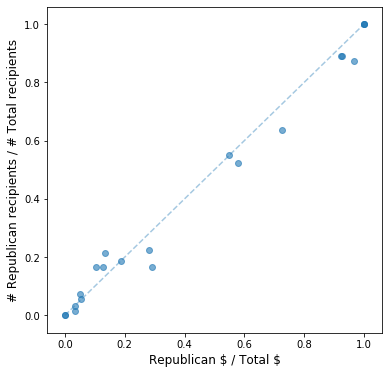

In [25]:
plt.figure(figsize = (6, 6))
plt.scatter(
    gave2_newest['r_amt:total'], 
    gave2_newest['r_count:total'], 
    alpha = 0.6, 
    
)
plt.plot(
    [0, max(gave2_newest['r_amt:total'].max(), gave2_newest['r_count:total'].max())], 
    [0, max(gave2_newest['r_amt:total'].max(), gave2_newest['r_count:total'].max())], 
    ls = '--',
    alpha = 0.4,
    
)
plt.xlabel('Republican \$ / Total \$', fontsize = 12)
plt.ylabel('# Republican recipients / # Total recipients', fontsize = 12)
plt.show();

In [26]:
for which in [0, 1]:
    print('proportion to R:', which, '\n')
    those = gave2_newest.loc[gave2_newest['r_amt:total'] == which, ['name', 'total']]
    print(those)
    print('\n')

proportion to R: 0 

               name  total
5  DAVEY CONSULTING   4000
9     HM CONSULTING   5600


proportion to R: 1 

                                name  total
0   2019 SENATORS' CLASSIC COMMITTEE  30000
14         REID POLITICAL CONSULTING   6100
18          THE OORBEEK MEMMOT GROUP  21000




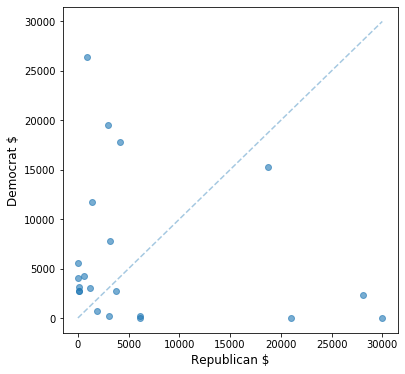

In [27]:
plt.figure(figsize = (6, 6))
gave2_lessmil = gave2_newest[~((gave2_newest['r_amt'] > 1.0E5) | (gave2_newest['d_amt'] > 1.0E5))]

plt.scatter(
    gave2_lessmil['r_amt'], 
    gave2_lessmil['d_amt'],
    alpha = 0.6, 
    
)
plt.plot(
    [0, max(gave2_lessmil['r_amt'].max(), gave2_lessmil['d_amt'].max())], 
    [0, max(gave2_lessmil['r_amt'].max(), gave2_lessmil['d_amt'].max())], 
    ls = '--',
    alpha = 0.4,
    
)
plt.xlabel('Republican \$', fontsize = 12)
plt.ylabel('Democrat \$', fontsize = 12)
plt.show();

In [28]:
cand.to_csv('data/04/cand_cleaned_04bII.csv', index = False)